<a href="https://colab.research.google.com/github/gabrielgranados97/TRABAJO_FINAL/blob/main/Trabajofinal_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gabriel Fernando Granados Alvarez**

**Universidad Nacional de Colombia**

**IA - PLN**

**Proyecto final**

In [ ]:
#Librerias
!pip install yfinance
import yfinance as yf
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np
from numpy import newaxis
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional
print("Versión de Tensorflow: ", tf.__version__)
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential, load_model

# optimizador
from tensorflow.keras.optimizers import Adam

from google.colab import drive #correr solo en colab
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.5 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Versión de Tensorflow:  2.8.2
Mounted at /content/gdrive


In [ ]:
#Ruta noticias

ruta='/content/gdrive/MyDrive/Colab Notebooks/Base_final.xlsx'

In [ ]:
column_names = ['Titular','url','Fecha','fuente']

data_news=pd.read_excel(ruta,names=column_names)
data_news

,Titular,url,Fecha,fuente
0,Turkey's energy minister in Iran for gas talks,https://www.investing.com/news/forex-news/turk...,2008-11-16,By Reuters
1,"Nikkei falls 1.5 pct as yen, economy hit expor...",https://www.investing.com/news/forex-news/nikk...,2008-12-04,By Reuters
2,U.K. PPI Continues To Decline At A Strong Pace,https://www.investing.com/news/forex-news/u.k....,2008-12-08,By LFB Forex
3,"GLOBAL MARKETS-World stocks slip, refocus on e...",https://www.investing.com/news/forex-news/glob...,2008-12-09,By Reuters
4,"U.K. PPI Input Drops, But Output Remains Flat",https://www.investing.com/news/forex-news/u.k....,2009-01-09,By LFB Forex
...,...,...,...,...
1338,Oil Up Over Tight Supply and Growing Demand,https://www.investing.com/news/commodities-new...,2022-05-23,By Investing.com
1339,"Oil Up, Near Two-Month High as Market Remains ...",https://www.investing.com/news/commodities-new...,2022-05-27,By Investing.com
1340,"Oil Up, Reactions to EU Agreement on Russian S...",https://www.investing.com/news/commodities-new...,2022-05-31,By Investing.com
1341,Oil Up as China Ends Shanghai Lockdown and EU ...,https://www.investing.com/news/commodities-new...,2022-06-01,By Investing.com


In [ ]:
!pip install transformers
import transformers
from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.3 MB/s 
     |████████████████████████████████| 101 kB 11.2 MB/s 
     |████████████████████████████████| 596 kB 45.4 MB/s 
     |████████████████████████████████| 6.6 MB 36.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#classifier = pipeline("sentiment-analysis")
#https://huggingface.co/mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis#model-description
classifier = pipeline("sentiment-analysis",model=('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis'))

Downloading:   0%|          | 0.00/933 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
titular=list(data_news['Titular'])
type(titular)
sent=classifier(titular)
sent_df = pd.DataFrame(sent) #columns = ['Sentimiento', 'Score']
sent_df

,label,score
0,neutral,0.999845
1,negative,0.998509
2,negative,0.890295
3,negative,0.998146
4,negative,0.997343
...,...,...
1338,positive,0.999545
1339,positive,0.999141
1340,positive,0.986190
1341,positive,0.743147


In [ ]:
#Desarrollo VADER
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
#Add VADER metrics to dataframe
data_news['compound'] = [analyzer.polarity_scores(v)['compound'] for v in data_news['Titular']]
data_news['neg'] = [analyzer.polarity_scores(v)['neg'] for v in data_news['Titular']]
data_news['neu'] = [analyzer.polarity_scores(v)['neu'] for v in data_news['Titular']]
data_news['pos'] = [analyzer.polarity_scores(v)['pos'] for v in data_news['Titular']]

data_news

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Titular,url,Fecha,fuente,compound,neg,neu,pos
0,Turkey's energy minister in Iran for gas talks,https://www.investing.com/news/forex-news/turk...,2008-11-16,By Reuters,0.2732,0.000,0.769,0.231
1,"Nikkei falls 1.5 pct as yen, economy hit expor...",https://www.investing.com/news/forex-news/nikk...,2008-12-04,By Reuters,0.0000,0.000,1.000,0.000
2,U.K. PPI Continues To Decline At A Strong Pace,https://www.investing.com/news/forex-news/u.k....,2008-12-08,By LFB Forex,0.5106,0.000,0.680,0.320
3,"GLOBAL MARKETS-World stocks slip, refocus on e...",https://www.investing.com/news/forex-news/glob...,2008-12-09,By Reuters,0.0000,0.000,1.000,0.000
4,"U.K. PPI Input Drops, But Output Remains Flat",https://www.investing.com/news/forex-news/u.k....,2009-01-09,By LFB Forex,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
1338,Oil Up Over Tight Supply and Growing Demand,https://www.investing.com/news/commodities-new...,2022-05-23,By Investing.com,0.0516,0.163,0.652,0.185
1339,"Oil Up, Near Two-Month High as Market Remains ...",https://www.investing.com/news/commodities-new...,2022-05-27,By Investing.com,0.0000,0.000,1.000,0.000
1340,"Oil Up, Reactions to EU Agreement on Russian S...",https://www.investing.com/news/commodities-new...,2022-05-31,By Investing.com,0.4939,0.000,0.758,0.242
1341,Oil Up as China Ends Shanghai Lockdown and EU ...,https://www.investing.com/news/commodities-new...,2022-06-01,By Investing.com,-0.4215,0.196,0.707,0.098


In [ ]:
# Parametros iniciales
start_date = datetime(2016, 1,1)
end_date = datetime(2020, 1, 1)

In [ ]:
#Datos

#Energia
acciones_ene=('XOM') #ExxonMobil
ticker_e = yf.download(acciones_ene, start = start_date,end = end_date)
ticker_e

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,77.500000,77.940002,76.459999,77.459999,56.406002,20400100
2016-01-05,77.190002,78.139999,76.919998,78.120003,56.886623,11993500
2016-01-06,76.639999,77.639999,76.589996,77.470001,56.413280,18826900
2016-01-07,76.059998,77.989998,75.900002,76.230003,55.510330,21263800
2016-01-08,76.349998,76.650002,74.500000,74.690002,54.388905,19033600
...,...,...,...,...,...,...
2019-12-24,70.349998,70.500000,69.910004,70.019997,59.803024,3979400
2019-12-26,70.190002,70.500000,70.010002,70.129997,59.896969,8840200
2019-12-27,70.199997,70.309998,69.879997,69.889999,59.691998,10516100


In [ ]:
# plot
len_data = len(ticker_e)
len_train = int(len_data*0.8) # 80%  = 804
len_test = len_data- len_train # 20% = 202
print (len_data, '=', len_train, '+',len_test)

1006 = 804 + 202


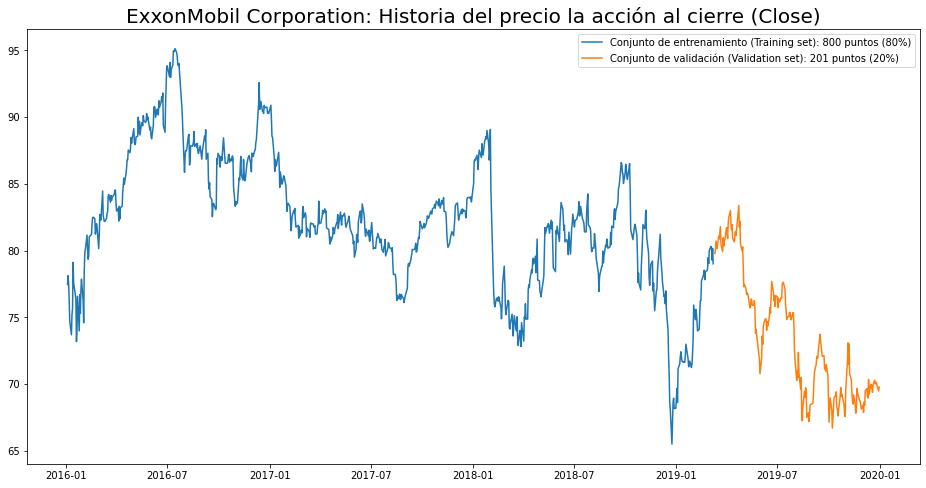

In [ ]:
data = pd.DataFrame(ticker_e[['Close']])
plt.figure(figsize=(16,8))
plt.plot(data[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (80%)'.format(len_train))
plt.plot(data['Close'][len_train:], label='Conjunto de validación (Validation set): {} puntos (20%)'.format(len_test)) 
plt.title("ExxonMobil Corporation: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

In [ ]:
#Hiperparametros

split = (0.80)
sequence_length=10
normalise= True
batch_size=32
input_dim=1
input_timesteps=9
neurons_1=128
neurons_2=64
neurons_3=32
epochs=20
prediction_len=1 #5 #10
dense_output=1
drop_out=0.2

cols = ['Close']

len_dataframe=data.shape[0]

In [ ]:
#datos de entrenamientos
#Sólo precios
i_split = int(len(data) * split)
data_train = data.get(cols).values[:i_split]
data_test  = data.get(cols).values[i_split:]
len_train  = len(data_train)
len_test   = len(data_test)
len_train_windows = None
print('data_train.shape',data_train.shape)
print('data_test.shape',data_test.shape)

data_train.shape (804, 1)
data_test.shape (202, 1)


In [ ]:
#Datos de prueba    
data_windows = []
for i in range(len_test - sequence_length):
    data_windows.append(data_test[i:i+sequence_length])
data_windows = np.array(data_windows).astype(float)

# Datos originales (y_test)
y_test_ori = data_windows[:, -1, [0]]
print('y_test_ori.shape',y_test_ori.shape)

window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]
normalised_data = []
record_min=[]
record_max=[]

#normalización
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(0,col_num):
      temp_col=window_data[win_i,:,col_i]
      temp_min=min(temp_col)
      if col_i==0:
        record_min.append(temp_min)#record min
      temp_col=temp_col-temp_min
      temp_max=max(temp_col)
      if col_i==0:
        record_max.append(temp_max)#record max
      temp_col=temp_col/temp_max
      normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

# normalised_data=window_data
data_windows=normalised_data #get_test_data
x_test = data_windows[:, :-1]
y_test = data_windows[:, -1, [0]]
print('x_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)

y_test_ori.shape (192, 1)
x_test.shape (192, 9, 1)
y_test.shape (192, 1)


In [ ]:
#Datos de entrenamiento
data_windows = []
for i in range(len_train - sequence_length):
    data_windows.append(data_train[i:i+sequence_length])
data_windows = np.array(data_windows).astype(float)
  
window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]

normalised_data = []
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(0,col_num):
      temp_col=window_data[win_i,:,col_i]
      temp_min=min(temp_col)
      temp_col=temp_col-temp_min
      temp_max=max(temp_col)
      temp_col=temp_col/temp_max
      normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

# normalised_data=window_data
data_windows=normalised_data
x_train = data_windows[:, :-1]
y_train = data_windows[:, -1,[0]]
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)

x_train.shape (794, 9, 1)
y_train.shape (794, 1)


In [ ]:
tf.random.set_seed(100)
#Modelo LSTM
# shapes
input_shape = (x_train.shape[1], x_train.shape[2])

# layers
inputs = Input(input_shape)
model = Sequential()
#model.add(LSTM(neurons_1,input_shape=input_shape, return_sequences = True, name='LSTM_layer_1'))
model.add(Bidirectional(LSTM(neurons_1, return_sequences = True, name='LSTM_layer'),input_shape=input_shape))
model.add(Dropout(drop_out, name= 'Dropout_01'))
#model.add(LSTM(neurons_2,return_sequences = True, name='LSTM_layer_2'))
model.add(Bidirectional(LSTM(neurons_2,return_sequences = True)))
#model.add(Dropout(drop_out, name= 'Dropout_02'))
#model.add(LSTM(neurons_3,return_sequences =False, name='LSTM_layer_3'))
model.add(Bidirectional(LSTM(neurons_3,return_sequences =False)))
model.add(Dropout(drop_out, name= 'Dropout_03'))
model.add(Dense(1, activation='relu'))

# model
# Compile model
model.compile(loss='mean_squared_error',
                optimizer='adam')

model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_93 (Bidirecti  (None, 9, 256)           133120    
 onal)                                                           
                                                                 
 Dropout_01 (Dropout)        (None, 9, 256)            0         
                                                                 
 bidirectional_94 (Bidirecti  (None, 9, 128)           164352    
 onal)                                                           
                                                                 
 bidirectional_95 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 Dropout_03 (Dropout)        (None, 64)                0         
                                                     

In [ ]:
#Entrenamiento
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/20
23/23 [==============================] - 16s 169ms/step - loss: 0.2215 - val_loss: 0.1400
Epoch 2/20
23/23 [==============================] - 1s 50ms/step - loss: 0.1549 - val_loss: 0.1196
Epoch 3/20
23/23 [==============================] - 1s 49ms/step - loss: 0.1323 - val_loss: 0.1010
Epoch 4/20
23/23 [==============================] - 1s 49ms/step - loss: 0.1108 - val_loss: 0.0951
Epoch 5/20
23/23 [==============================] - 1s 51ms/step - loss: 0.0935 - val_loss: 0.0862
Epoch 6/20
23/23 [==============================] - 1s 50ms/step - loss: 0.0856 - val_loss: 0.0849
Epoch 7/20
23/23 [==============================] - 1s 50ms/step - loss: 0.0881 - val_loss: 0.0840
Epoch 8/20
23/23 [==============================] - 1s 50ms/step - loss: 0.0869 - val_loss: 0.0837
Epoch 9/20
23/23 [==============================] - 1s 50ms/step - loss: 0.0864 - val_loss: 0.0832
Epoch 10/20
23/23 [==============================] - 1s 52ms/step - loss: 0.0874 - val_loss: 0.0828
Epoch 1

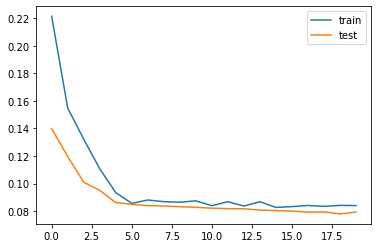

In [ ]:
#Función de pérdida
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend();

In [ ]:
#Predicción
data=x_test
prediction_seqs = []
window_size=sequence_length
pre_win_num=int(len(data)/prediction_len)

for i in range(0,pre_win_num):
    curr_frame = data[i*prediction_len]
    predicted = []
    for j in range(0,prediction_len):
      temp=model.predict(curr_frame[newaxis,:,:])[0]
      predicted.append(temp)
      curr_frame = curr_frame[1:]
      curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
    prediction_seqs.append(predicted)
    
print(prediction_seqs)


[[array([0.47891793], dtype=float32)], [array([0.4576802], dtype=float32)], [array([0.52774364], dtype=float32)], [array([0.6825156], dtype=float32)], [array([0.7542026], dtype=float32)], [array([0.78426677], dtype=float32)], [array([0.82818544], dtype=float32)], [array([0.87821853], dtype=float32)], [array([0.9369044], dtype=float32)], [array([0.88145024], dtype=float32)], [array([0.73444253], dtype=float32)], [array([0.64593524], dtype=float32)], [array([0.47873065], dtype=float32)], [array([0.3414168], dtype=float32)], [array([0.30392283], dtype=float32)], [array([0.39347067], dtype=float32)], [array([0.45822182], dtype=float32)], [array([0.75649357], dtype=float32)], [array([0.91850543], dtype=float32)], [array([0.84502494], dtype=float32)], [array([0.8137328], dtype=float32)], [array([0.557834], dtype=float32)], [array([0.36731997], dtype=float32)], [array([0.29372075], dtype=float32)], [array([0.21494046], dtype=float32)], [array([0.17309226], dtype=float32)], [array([0.22840688]

In [ ]:
#Predicción escala original
de_predicted=[]
len_pre_win=int(len(data)/prediction_len)
len_pre=prediction_len

m=0
for i in range(0,len_pre_win):
    for j in range(0,len_pre):
      de_predicted.append(prediction_seqs[i][j][0]*record_max[m]+record_min[m])
      m=m+1
print(de_predicted)

[80.81557600698102, 80.7758613917174, 80.90688022067707, 81.19630425514697, 81.33035911045408, 81.59049021823012, 82.04843449471537, 82.67606084810177, 82.83216539522437, 82.73207727975705, 82.41577438095464, 82.25646453881609, 81.77501781997057, 81.45233049897729, 81.36421971735808, 81.5746570111603, 81.726822110684, 82.7152257355774, 83.15751742610519, 82.95691601089311, 82.84168516739464, 81.8722130471806, 81.22256086565153, 80.05342264195974, 78.59898752087702, 78.34413215087125, 78.55754023045301, 77.92853689938784, 78.1583930104971, 77.55595468650381, 77.67412435613187, 77.6574524005157, 76.73106326708216, 75.99965053667722, 76.25859844037677, 76.24976685480806, 76.08849395456377, 76.13999693901405, 76.17361627701439, 74.217511834221, 73.85500995995466, 72.62361904083548, 72.21452070903983, 72.32750119126467, 71.59032269184536, 71.81665743928647, 72.41849676741595, 73.10392302001446, 72.80825321578732, 73.64315003618685, 74.36704269861002, 74.43733603806822, 74.20808051790118, 73

In [ ]:
#Evaluación
error = []
diff=y_test.shape[0]-prediction_len*pre_win_num

for i in range(y_test_ori.shape[0]-diff):
    error.append(y_test_ori[i,] - de_predicted[i])
    
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val) 
    absError.append(abs(val))

error_percent=[]
for i in range(len(error)):
    val=absError[i]/y_test_ori[i,]
    val=abs(val)
    error_percent.append(val)

mean_error_percent=sum(error_percent) / len(error_percent)
accuracy=1-mean_error_percent

MSE=sum(squaredError) / len(squaredError)

print("MSE",MSE)
print('accuracy',accuracy)
print('mean_error_percent',mean_error_percent)

MSE [0.72822194]
accuracy [0.99076211]
mean_error_percent [0.00923789]


*Fin*

**Propuesta de modelo utilizando el sentimiento de las noticias como input**

In [ ]:
#Datos consolidados
ruta_1='/content/gdrive/MyDrive/Colab Notebooks/Base_n.xlsx' #n
ruta_2='/content/gdrive/MyDrive/Colab Notebooks/Base_n-1.xlsx' #n-1
ruta_3='/content/gdrive/MyDrive/Colab Notebooks/Base_n-3.xlsx' #n-3
ruta_4='/content/gdrive/MyDrive/Colab Notebooks/Base_n-5.xlsx' #n-5

In [ ]:
#Análisis de datos utilizando el analisis de sentimientos
data_nn=pd.read_excel(ruta_1)
data_nn


,Date,Close,compound
0,2016-01-04,77.459999,-0.661
1,2016-01-05,78.120003,0.000
2,2016-01-06,77.470001,0.000
3,2016-01-07,76.230003,0.000
4,2016-01-08,74.690002,0.000
...,...,...,...
1001,2019-12-24,70.019997,0.000
1002,2019-12-26,70.129997,0.000
1003,2019-12-27,69.889999,0.000
1004,2019-12-30,69.480003,0.000


In [ ]:
len_dataframe=data_nn.shape[0]
len_dataframe

1006

In [ ]:
#Preparación de los datos
#Features
features_t=['Close','compound']
features = data_nn[features_t]
features.index = data_nn['Date']
features.head()

,Close,compound
Date,,
2016-01-04,77.459999,-0.661
2016-01-05,78.120003,0.000
2016-01-06,77.470001,0.000
2016-01-07,76.230003,0.000
2016-01-08,74.690002,0.000


<Figure size 432x288 with 0 Axes>

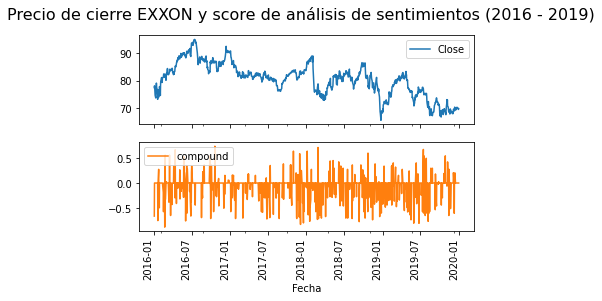

In [ ]:
plt.figure()
features.plot(subplots=True, rot=90, xlabel='Fecha')
plt.suptitle('Precio de cierre EXXON y score de análisis de sentimientos (2016 - 2019)', fontsize=16)
plt.show()

In [ ]:
#Hiperpárametros generales
split = 0.80
sequence_length=10
normalise= True
batch_size=32
input_dim=2
input_timesteps=9
neurons_1=128
neurons_2=64
neurons_3=32
epochs=20
prediction_len=1
dense_output=1
drop_out=0.2

In [ ]:
#Data sin rezago
datos_n = pd.read_excel(ruta_4)
cols = ['Close','compound']

len_data_n=datos_n.shape[0]

i_split = int(len(datos_n) * split)
data_train = datos_n.get(cols).values[:i_split]
data_test  = datos_n.get(cols).values[i_split:]
len_train  = len(data_train)
len_test   = len(data_test)
len_train_windows = None
print('data_train.shape',data_train.shape)
print('data_test.shape',data_test.shape)


data_train.shape (800, 2)
data_test.shape (201, 2)


In [ ]:
#datos de prueba 
data_windows = []
for i in range(len_test - sequence_length):
    data_windows.append(data_test[i:i+sequence_length])
data_windows = np.array(data_windows).astype(float)
 # get original y_test
y_test_ori = data_windows[:, -1, [0]]
print('y_test_ori.shape',y_test_ori.shape)

window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]
normalised_data = []
record_min=[]
record_max=[]


y_test_ori.shape (191, 1)


In [ ]:
#normalize
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(0,1):#col_num):
      temp_col=window_data[win_i,:,col_i]
      temp_min=min(temp_col)
      if col_i==0:
        record_min.append(temp_min)#record min
      temp_col=temp_col-temp_min
      temp_max=max(temp_col)
      if col_i==0:
        record_max.append(temp_max)#record max
      temp_col=temp_col/temp_max
      normalised_window.append(temp_col)
    for col_i in range(1,col_num):
      temp_col=window_data[win_i,:,col_i]
      normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

# Normalización
data_windows=normalised_data#get_test_data
x_test = data_windows[:, :-1]
y_test = data_windows[:, -1, [0]]
print('x_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)

x_test.shape (191, 9, 2)
y_test.shape (191, 1)


In [ ]:
#Datos de entrenamiento
data_windows = []
for i in range(len_train - sequence_length):
    data_windows.append(data_train[i:i+sequence_length])
data_windows = np.array(data_windows).astype(float)
  
window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]

normalised_data = []

for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(0,1):#col_num):
      temp_col=window_data[win_i,:,col_i]
      temp_min=min(temp_col)
      if col_i==0:
        record_min.append(temp_min)#record min
      temp_col=temp_col-temp_min
      temp_max=max(temp_col)
      if col_i==0:
        record_max.append(temp_max)#record max
      temp_col=temp_col/temp_max
      normalised_window.append(temp_col)
    for col_i in range(1,col_num):
      temp_col=window_data[win_i,:,col_i]
      normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

# normalised_data=window_data
data_windows=normalised_data
x_train = data_windows[:, :-1]
y_train = data_windows[:, -1,[0]]
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)

x_train.shape (790, 9, 2)
y_train.shape (790, 1)


In [ ]:
tf.random.set_seed(100)
# LSTM MODEL
model_newsn = Sequential()
model_newsn.add(Bidirectional(LSTM(neurons_1, return_sequences = True), input_shape=(input_timesteps, input_dim)))
#model_newsn.add(LSTM(neurons_1, return_sequences = True, input_shape=(input_timesteps, input_dim)))
model_newsn.add(Dropout(drop_out))
model_newsn.add(Bidirectional(LSTM(neurons_2,return_sequences = True)))
#model_newsn.add(LSTM(neurons_2,return_sequences = True))
#model_newsn.add(Dropout(drop_out))
model_newsn.add(Bidirectional(LSTM(neurons_3,return_sequences =False)))
#model_newsn.add(LSTM(neurons_3,return_sequences =False))
model_newsn.add(Dropout(drop_out))
model_newsn.add(Dense(dense_output, activation='relu'))
# Compile model
model_newsn.compile(loss='mean_squared_error',
                optimizer='adam')
# Fit the model
history_3=model_newsn.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/20
23/23 [==============================] - 15s 164ms/step - loss: 0.2311 - val_loss: 0.1395
Epoch 2/20
23/23 [==============================] - 1s 48ms/step - loss: 0.1503 - val_loss: 0.1129
Epoch 3/20
23/23 [==============================] - 1s 49ms/step - loss: 0.1136 - val_loss: 0.0832
Epoch 4/20
23/23 [==============================] - 1s 49ms/step - loss: 0.0866 - val_loss: 0.0850
Epoch 5/20
23/23 [==============================] - 1s 51ms/step - loss: 0.0924 - val_loss: 0.0849
Epoch 6/20
23/23 [==============================] - 1s 51ms/step - loss: 0.0851 - val_loss: 0.0848
Epoch 7/20
23/23 [==============================] - 1s 49ms/step - loss: 0.0883 - val_loss: 0.0841
Epoch 8/20
23/23 [==============================] - 1s 50ms/step - loss: 0.0842 - val_loss: 0.0825
Epoch 9/20
23/23 [==============================] - 1s 51ms/step - loss: 0.0859 - val_loss: 0.0823
Epoch 10/20
23/23 [==============================] - 1s 51ms/step - loss: 0.0838 - val_loss: 0.0817
Epoch 1

In [ ]:
model_newsn.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_90 (Bidirecti  (None, 9, 256)           134144    
 onal)                                                           
                                                                 
 dropout_72 (Dropout)        (None, 9, 256)            0         
                                                                 
 bidirectional_91 (Bidirecti  (None, 9, 128)           164352    
 onal)                                                           
                                                                 
 bidirectional_92 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dropout_73 (Dropout)        (None, 64)                0         
                                                     

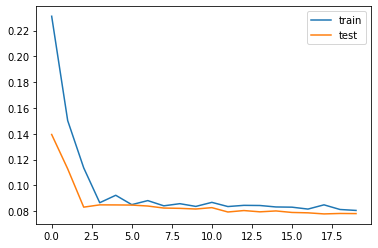

In [ ]:
plt.plot(history_3.history['loss'][:], label='train')
plt.plot(history_3.history['val_loss'][:], label='test')
plt.legend()

In [ ]:
#multi sequence predict
data=x_test
prediction_seqs = []
window_size=sequence_length
pre_win_num=int(len(data)/prediction_len)

for i in range(0,pre_win_num):
    curr_frame = data[i*prediction_len]
    predicted = []
    for j in range(0,prediction_len):
      temp=model_newsn.predict(curr_frame[newaxis,:,:])[0]
      predicted.append(temp)
      curr_frame = curr_frame[1:]
      curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
    prediction_seqs.append(predicted)
    
print(prediction_seqs)


[[array([0.4023523], dtype=float32)], [array([0.4689939], dtype=float32)], [array([0.6357471], dtype=float32)], [array([0.71549237], dtype=float32)], [array([0.7498703], dtype=float32)], [array([0.79599506], dtype=float32)], [array([0.8475102], dtype=float32)], [array([0.8960923], dtype=float32)], [array([0.84926647], dtype=float32)], [array([0.7012081], dtype=float32)], [array([0.6270883], dtype=float32)], [array([0.4546252], dtype=float32)], [array([0.3039691], dtype=float32)], [array([0.24078088], dtype=float32)], [array([0.33116186], dtype=float32)], [array([0.40611556], dtype=float32)], [array([0.69029874], dtype=float32)], [array([0.8667452], dtype=float32)], [array([0.80174285], dtype=float32)], [array([0.7786421], dtype=float32)], [array([0.52509004], dtype=float32)], [array([0.32708], dtype=float32)], [array([0.25046766], dtype=float32)], [array([0.14728741], dtype=float32)], [array([0.09404287], dtype=float32)], [array([0.10308257], dtype=float32)], [array([0.10854414], dtype

In [ ]:
#Pronóstico escala real
de_predicted=[]
len_pre_win=int(len(data)/prediction_len)
len_pre=prediction_len

m=0
for i in range(0,len_pre_win):
    for j in range(0,len_pre):
      de_predicted.append(prediction_seqs[i][j][0]*record_max[m]+record_min[m])
      m=m+1
print(de_predicted)

[80.67239808114729, 80.79701805420152, 81.108846945478, 81.25797086178588, 81.5172255700454, 81.96570522156387, 82.59437662309574, 82.72360512589876, 82.65934189902009, 82.34265876401332, 82.21688601652022, 81.71837002704115, 81.36432841231772, 81.21583621493039, 81.42823138369658, 81.60437247624645, 82.534514126145, 83.01621214757591, 82.8387560856981, 82.74027310947798, 81.76055616974867, 81.0853427618476, 79.84970060901739, 78.18698072422508, 77.86272163373265, 77.77426334656768, 77.31699399650094, 77.4449249655008, 77.04593878952065, 77.1682014464372, 77.33609079260867, 76.51647183031191, 75.90624897815917, 76.21043813411866, 76.21300857174259, 76.03459569235561, 76.04987790525725, 76.13128805803714, 74.14781120717198, 73.7900009155273, 72.6100006103515, 72.1600036621093, 72.06397434291543, 71.45094566216244, 71.51085509205302, 72.09918060603798, 72.93298911160375, 72.6237100710409, 73.44512406310963, 74.14888019146332, 74.21172250257808, 73.95292962054049, 73.3974192449718, 73.667

In [ ]:
error = []
diff=y_test.shape[0]-prediction_len*pre_win_num

for i in range(y_test_ori.shape[0]-diff):
    error.append(y_test_ori[i,] - de_predicted[i])
    
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val) 
    absError.append(abs(val))

error_percent=[]
for i in range(len(error)):
    val=absError[i]/y_test_ori[i,]
    val=abs(val)
    error_percent.append(val)

mean_error_percent=sum(error_percent) / len(error_percent)
accuracy=1-mean_error_percent

MSE=sum(squaredError) / len(squaredError)

print("MSE",MSE)
print('accuracy',accuracy)
print('mean_error_percent',mean_error_percent)

MSE [0.64137955]
accuracy [0.99124372]
mean_error_percent [0.00875628]


In [ ]:
#print(y_test_ori.shape)
#print(length(de_predicted)

#type(y_test_ori)

x=pd.DataFrame({'Original': y_test_ori,'Predicho': de_predicted.pop(0)})
x.set_axis(['Original','Predicho'], axis=1)
x

plt.plot(np.arange(0, len(y_test_ori)), x['Original'], marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_test_ori)), x['Predicho'], marker='+', label="predicho")
plt.xlabel('Time Step')
plt.annotate("epochs=20" , xy=(100, 143), size = 15)
plt.title("Exxon: Intervalo de predicción a un día. Escala original", size = 20)
plt.legend()
plt.show();

ValueError: ignored

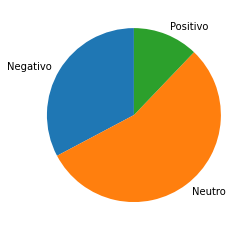

In [ ]:
y = np.array([224, 377, 83])
mylabels = ["Negativo", "Neutro", "Positivo"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 